In [7]:
import mnist_reader

X_train, y_train = mnist_reader.load_mnist('../data/fashion/', kind='train')
X_test, y_test = mnist_reader.load_mnist('../data/fashion', kind='t10k')

In [8]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(hidden_layer_sizes=(256,128,64))
%time MLP.fit(X_train, y_train)

Wall time: 4min 20s


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(256, 128, 64), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [9]:
%time predict = MLP.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,predict))

Wall time: 158 ms
0.8819


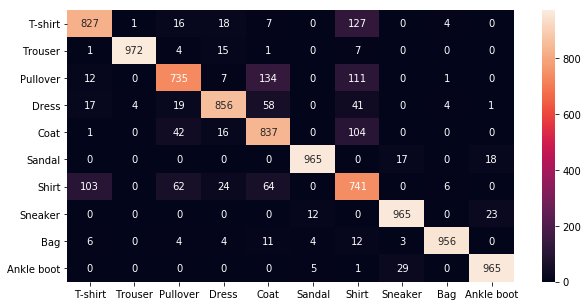

In [10]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
array = confusion_matrix(y_test, predict)

labels = ['T-shirt', 'Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

df_cm = pd.DataFrame(array, index = [i for i in labels],
                  columns = [i for i in labels], dtype='float64')
plt.figure(figsize = (10,5))
sn.heatmap(df_cm, annot=True,fmt='g')
plt.show()